## Collection_DS_takehome_challenges: Funnel Analysis of e-commerce Website

### Kanja SahaJJ
### 10/15/2018

You are looking at data from an e-commerce website. The site is very simple and has just 4 pages: The ﬁrst page is the home page. When you come to the site for the ﬁrst time, you can only land on the home page as a ﬁrst page. From the home page, the user can perform a search and land on the search page. From the search page, if the user clicks on a product, she will get to the payment page, where she is asked to provide payment information in order to buy that product. If she does decide to buy, she ends up on the conﬁrmation page.

The company CEO isn't very happy with the volume of sales and, especially, of sales coming from new users. Therefore, she asked you to investigate whether there is something wrong in the conversion funnel or, in general, if you could suggest how conversion rate can be improved
Speciﬁcally, she is interested in :
- A full picture of funnel conversion rate for both desktop and 
- mobile Some insights on what the product team should focus on in order to improve conversion rate as well as anything you might discover that could help improve conversion rate. 



### 1. Import Libraries & Data Load 

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
from IPython.display import display,Markdown
from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns

def printbold(string,df):
    display(Markdown(string),df)


In [2]:
home_page=pd.read_csv("home_page_table.csv")
search_page=pd.read_csv("search_page_table.csv")
user_table=pd.read_csv("user_table.csv")
payment_page=pd.read_csv("payment_page_table.csv")
payment_confirmation=pd.read_csv("payment_confirmation_table.csv")

display(home_page.head())
display(search_page.head())
display(user_table.head())
display(payment_page.head())
display(payment_confirmation.head())

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


In [3]:
df=user_table.merge(home_page,on='user_id',how='left').merge(search_page,on='user_id',how='left').merge(payment_page,on='user_id',how='left').merge(payment_confirmation,on='user_id',how='left')

display(df.head())

,user_id,date,device,sex,page_x,page_y,page_x,page_y
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [4]:
df.columns = ['user_id', 'date','device','sex','home_page','search_page','payment_page','payment_confirmation_page']
df['date'] = pd.to_datetime(df['date'])
df.head(10)

,user_id,date,device,sex,home_page,search_page,payment_page,payment_confirmation_page
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN
5,993454,2015-03-03,Desktop,Male,home_page,NaN,NaN,NaN
6,377150,2015-04-15,Desktop,Female,home_page,search_page,NaN,NaN
7,137258,2015-01-27,Mobile,Male,home_page,NaN,NaN,NaN
8,608249,2015-04-12,Desktop,Female,home_page,NaN,NaN,NaN
9,615615,2015-02-24,Mobile,Female,home_page,search_page,NaN,NaN


### 2. Exploratory Data Analysis

#### First we make sure the data provided is accurate.
#### i.e. all users who have visited the payment page must have been to search page and also on the homepage.
#### The result below shows that there is no rows that has entered the funnel after the home page directly.


In [5]:
display(df[df.search_page.notnull() & df.home_page.isnull()].size)
display(df[df.payment_page.notnull() & (df.search_page.isnull() |  df.home_page.isnull())].size)
display(df[df.payment_confirmation_page.notnull() & (df.payment_page.isnull() | df.search_page.isnull() | df.home_page.isnull())].size)

0

0

0

In [6]:
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
df_d=df.groupby(['device','date'], as_index=False)['user_id'].agg({'user_count':'count'})

printbold('**A sample of the dataset grouped by date and device:**',df_d.head())
printbold('**5 point Summary of the dataset:**',df_d.describe())

**A sample of the dataset grouped by date and device:**

,device,date,user_count
0,Desktop,2015-01-01,493
1,Desktop,2015-01-02,484
2,Desktop,2015-01-03,507
3,Desktop,2015-01-04,474
4,Desktop,2015-01-05,483


**5 point Summary of the dataset:**

,user_count
count,240.000000
mean,376.666667
std,127.668034
min,204.000000
25%,252.000000
50%,365.500000
75%,496.250000
max,585.000000


In [7]:
printbold('**5 point Summary of the dataset Desktop users:**',df_d[df_d['device']=='Desktop'].describe())
printbold('**5 point Summary of the dataset Mobile users:**',df_d[df_d['device']=='Mobile'].describe())

**5 point Summary of the dataset Desktop users:**

,user_count
count,120.000000
mean,501.666667
std,29.379960
min,439.000000
25%,480.750000
50%,496.500000
75%,520.250000
max,585.000000


**5 point Summary of the dataset Mobile users:**

,user_count
count,120.000000
mean,251.666667
std,18.958749
min,204.000000
25%,237.000000
50%,252.000000
75%,266.000000
max,292.000000


**Density plot by device**

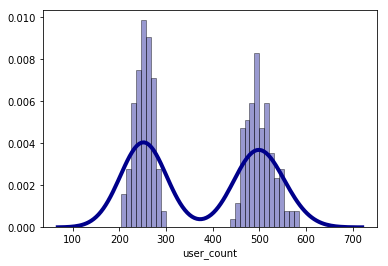

In [8]:
display(Markdown('**Density plot by device**'))
sns.distplot(df_d['user_count'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


C:\Users\kanja\Anaconda3\envs\py35\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


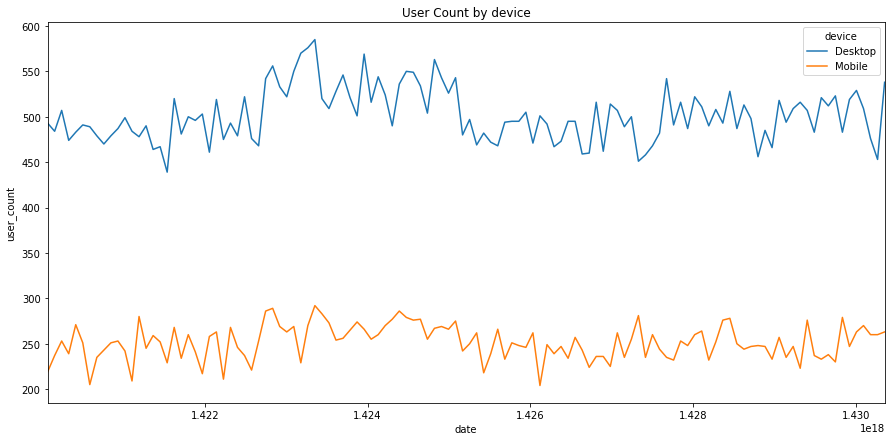

In [9]:
#import matplotlib.dates as mdates
#fig, ax = plt.subplots()
plt.figure(figsize=(15,7))

sns.tsplot(data=df_d, time="date", unit="device", condition="device", value="user_count") #,ax=ax
#ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

# put the labels at 45deg since they tend to be too long
#fig.autofmt_xdate()
plt.title("User Count by device")
plt.show()


**From the charts and data summary above, we observe the following:**
- Number of users coming through Desktop (averaging around 500) is significantly higher(more than twice) that mobile(averaging at 250)
- The daily count of users have similar distribution across device

In [10]:
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
df_x=df.groupby(['sex','date','device'], as_index=False)['user_id'].agg({'user_count':'count'})
printbold('**5 point Summary of the dataset:**',df_x.head())
printbold('**5 point Summary of the dataset Male users:**',df_x[df_x['sex']=='Male'].describe())
printbold('**5 point Summary of the dataset Female users:**',df_x[df_x['sex']=='Female'].describe())

**5 point Summary of the dataset:**

,sex,date,device,user_count
0,Female,2015-01-01,Desktop,229
1,Female,2015-01-01,Mobile,122
2,Female,2015-01-02,Desktop,236
3,Female,2015-01-02,Mobile,119
4,Female,2015-01-03,Desktop,248


**5 point Summary of the dataset Male users:**

,user_count
count,240.000000
mean,188.854167
std,65.053242
min,94.000000
25%,126.000000
50%,180.000000
75%,251.250000
max,307.000000


**5 point Summary of the dataset Female users:**

,user_count
count,240.000000
mean,187.812500
std,64.076202
min,90.000000
25%,125.000000
50%,182.500000
75%,248.000000
max,299.000000


**Density plot by device**

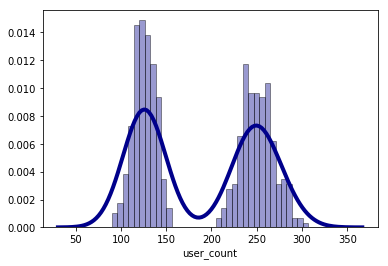

In [11]:
display(Markdown('**Density plot by device**'))
sns.distplot(df_x['user_count'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

,sex,date,device,user_count,device_sex
0,Female,2015-01-01,Desktop,229,Female-Desktop
1,Female,2015-01-01,Mobile,122,Female-Mobile
2,Female,2015-01-02,Desktop,236,Female-Desktop
3,Female,2015-01-02,Mobile,119,Female-Mobile
4,Female,2015-01-03,Desktop,248,Female-Desktop


C:\Users\kanja\Anaconda3\envs\py35\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


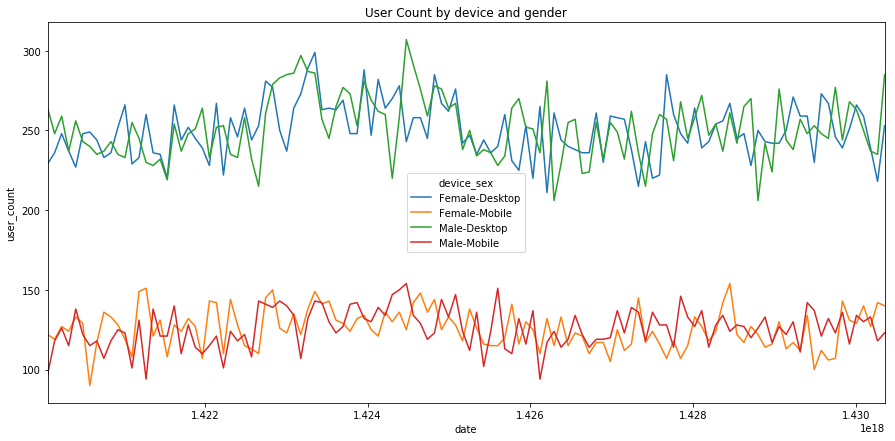

In [12]:
df_x['device_sex']=df_x['sex']+'-'+df_x['device']
display(df_x.head())
plt.figure(figsize=(15,7))

sns.tsplot(data=df_x, time="date", unit="device_sex", condition="device_sex", value="user_count")
plt.title("User Count by device and gender")
plt.show()

In [ ]:
**From the summary stats and charts segmented by Male/Female and Desktop/Mobile segments, we observe:**
- There is no significant different between the male and femalee users coming to the website.

In [ ]:
### 3a. Funnel Analysis on aggregate level
Now, lets look at the conversion funnel for each desktop and mobile as well as male and female users, first by each feature independently and then combining the two.

The tables explain the rate of change at each step.

In [ ]:
df1=df.groupby(['device'])['home_page', 'search_page','payment_page','payment_confirmation_page'].agg('count').transpose()
display(df1)
df1.pct_change()+1